In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from datetime import time, timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import math
import random
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.metrics import mean_squared_error
path_final = 'dados_finais/'
from sklearn import preprocessing
from sklearn import svm
import os
%matplotlib inline

/home/matheuspds/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/home/matheuspds/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/matheuspds/miniconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_test1 = pd.read_csv(path_final+"test1.csv")
df_test2 = pd.read_csv(path_final+"test2.csv")
df_test3 = pd.read_csv(path_final+"test3.csv")
df_test4 = pd.read_csv(path_final+"test4.csv")
df_train1 = pd.read_csv(path_final+"train1.csv")
df_train2 = pd.read_csv(path_final+"train2.csv")
df_train3 = pd.read_csv(path_final+"train3.csv")
df_train4 = pd.read_csv(path_final+"train4.csv")

In [47]:
df_teste_para_weekday = pd.read_csv('data_after_process/teste_final_para_weekday.csv')

In [48]:
df_train1 = df_train1.rename(columns = {'time_start':'time', 'weekday': 'week'})
df_train2 = df_train2.rename(columns = {'time_start':'time', 'weekday': 'week'})
df_train3 = df_train3.rename(columns = {'time_start':'time', 'weekday': 'week'})
df_train4 = df_train4.rename(columns = {'time_start':'time', 'weekday': 'week'})
df_test1 = df_test1.rename(columns = {'time_start':'time', 'weekday': 'week'})


In [49]:
#removendo outliers do df_train1
df_remove = df_train1.loc[(df_train1['day'] >= 1) & (df_train1['day'] <= 7) ]

df_train1 = df_train1.drop(df_remove.index)

In [50]:
#removendo outliers do df_train2
df_remove = df_train2.loc[(df_train2['day'] >= 1) & (df_train2['day'] <= 7) ]

df_train2 = df_train2.drop(df_remove.index)

In [51]:
#removendo outliers do df_train3
df_remove = df_train3.loc[(df_train3['day'] >= 1) & (df_train3['day'] <= 7) ]

df_train3 = df_train3.drop(df_remove.index)

In [52]:
#removendo outliers do df_train4
df_remove = df_train4.loc[(df_train4['day'] >= 1) & (df_train4['day'] <= 7) ]

df_train4 = df_train4.drop(df_remove.index)

In [53]:
def adiciona_media_desvio_por_dia(df):
    df['media_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])["volume"].transform(np.mean)
    df['desvio_padrao_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])["volume"].transform(np.std)
    df['desvio_padrao_hora_dia'].fillna(df.groupby(['direction', 'tollgate_id', 'day', 'hour'])["volume"].transform(np.mean), inplace=True)
    df['min_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])['volume'].transform(np.min)
    df['max_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])['volume'].transform(np.max)
    df['mediana_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])['volume'].transform(np.median)
    return df

In [54]:
def medidas_volume_tollgate_direction_am_pm(df):
    df['min_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.min)
    df['max_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.max)
    df['mediana_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.median)
    df['media_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.mean)
    df['desvio_padrao_am_pm'] = df.groupby(['day','direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.std)
    df['desvio_padrao_am_pm'].fillna(df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.mean), inplace=True)
    return df

In [55]:
del df_train1['media_volume']
del df_train1['desvio_padrao']

del df_train2['media_volume']
del df_train2['desvio_padrao']

del df_train3['media_volume']
del df_train3['desvio_padrao']

del df_train4['media_volume']
del df_train4['desvio_padrao']

del df_test1['media_volume']
del df_test1['desvio_padrao']

In [56]:
df_train1 =adiciona_media_desvio_por_dia(df_train1)
df_train2 = adiciona_media_desvio_por_dia(df_train2)
df_train3 = adiciona_media_desvio_por_dia(df_train3)
df_train4 = adiciona_media_desvio_por_dia(df_train4)
df_test1 = adiciona_media_desvio_por_dia(df_test1)

In [57]:
df_train1 = medidas_volume_tollgate_direction_am_pm(df_train1)
df_train2 = medidas_volume_tollgate_direction_am_pm(df_train2)
df_train3 = medidas_volume_tollgate_direction_am_pm(df_train3)
df_train4 = medidas_volume_tollgate_direction_am_pm(df_train4)
df_test1 = medidas_volume_tollgate_direction_am_pm(df_test1)

In [58]:
def adiciona_media_desvio_por_janela_dia_semana_1(df):
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-09-26 00:00:00')
    df = df.loc[mask]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    return df

def adiciona_media_desvio_por_janela_dia_semana_2(df):
    
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask2 = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-10-10 00:00:00')
    df = df.loc[mask2]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    
    return df

def adiciona_media_desvio_por_janela_dia_semana_3(df):
    
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask3 = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-10-17 00:00:00')
    df = df.loc[mask3]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    return df

def adiciona_media_desvio_por_janela_dia_semana_4(df):   
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask4 = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-10-25 00:00:00')
    df = df.loc[mask4]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week','direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    return df

def adiciona_media_desvio_por_janela_dia_semana_5_teste(df1, df2):
    df_list = [df1, df2]
    df = pd.concat(df_list, ignore_index=True)
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask4 = (df['time'] >= '2016-10-18 00:00:00') & (df['time'] < '2016-11-01 00:00:00')
    df = df.loc[mask4]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week','direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    
    
    return df

In [59]:
df_train4_a_25 = adiciona_media_desvio_por_janela_dia_semana_1(df_train4)
df_train4_a_10 = adiciona_media_desvio_por_janela_dia_semana_2(df_train4)
df_train4_a_17 = adiciona_media_desvio_por_janela_dia_semana_3(df_train4)
df_train4_a_24 = adiciona_media_desvio_por_janela_dia_semana_4(df_train4)
df_teste_a_24 = adiciona_media_desvio_por_janela_dia_semana_5_teste(df_teste_para_weekday, df_test1)

/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [60]:
len4_train1 = len(df_train4_a_25)
len4_train2 = len(df_train4_a_10)
len4_train3 = len(df_train4_a_17)
len4_train4 = len(df_train4_a_24)

x1 = df_train4_a_25.ix[:len4_train1 - 1, 23:]
x2 = df_train4_a_10.ix[:len4_train2 - 1, 23:]
x3 = df_train4_a_17.ix[:len4_train3 - 1, 23:]
x4 = df_train4_a_24.ix[:len4_train4 - 1, 23:]

df_train_list4 = [x1, x2, x3, x4]


/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipyk

In [91]:
x4.head()

,min_volume_weekday,max_volume_weekday,mediana_volume_weekday,media_volume_weekday,desvio_padrao_weekday
0,7,15,10.0,10.8,3.193744
1,4,12,11.0,9.6,3.361547
2,4,10,5.0,6.4,2.509980
3,1,18,4.0,7.6,6.877500
4,3,8,5.0,5.2,1.923538


In [61]:
df_train_para_agregar4 = pd.concat(df_train_list4, ignore_index=True)

In [62]:
df_train4['media_volume_weekday'] = df_train_para_agregar4['media_volume_weekday']
df_train4['min_volume_weekday'] = df_train_para_agregar4['min_volume_weekday']
df_train4['max_volume_weekday'] = df_train_para_agregar4['max_volume_weekday']
df_train4['desvio_padrao_weekday'] = df_train_para_agregar4['desvio_padrao_weekday']
df_train4['mediana_volume_weekday'] = df_train_para_agregar4['mediana_volume_weekday']

In [94]:
df_train4.to_csv('result_final/train4_final.csv', index=False)

In [71]:
df_test1['min_volume_weekday'] = df_teste_a_24['min_volume_weekday']
df_test1['max_volume_weekday'] = df_teste_a_24['max_volume_weekday']
df_test1['mediana_volume_weekday'] = df_teste_a_24['mediana_volume_weekday']
df_test1['media_volume_weekday'] = df_teste_a_24['media_volume_weekday']
df_test1['desvio_padrao_weekday'] = df_teste_a_24['desvio_padrao_weekday']

In [72]:
df_test1.to_csv('result_final/test_final.csv', index=False)

In [14]:
df_train_list = [df_train1,df_train2, df_train3, df_train4]
#df_test_list = [df_test1, df_test2, df_test3, df_test4]

In [15]:
random.shuffle(df_train_list)
df_train = pd.concat(df_train_list)

/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [164]:
df_train_grouped = df_train.groupby(["tollgate_id", "direction"])
df_test_grouped = df_test.groupby(["tollgate_id", "direction"])
result = []
oob = []
for key, train_data in df_train_grouped:
    test_data = df_test_grouped.get_group(key)
    len_train = len(train_data)
    regressor_cubic = RandomForestRegressor(n_estimators=500, max_depth=6)
    train_data = pd.DataFrame.reset_index(train_data)
    train_data = train_data.drop("index", axis=1)
    y = train_data.ix[:len_train - 1, :]["volume"]

    x = train_data[['week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']]
    x1 = test_data[['week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']]
    regressor_cubic.fit(x, y)
    yhat = regressor_cubic.predict(x1)
    
    test_data["volume"] = yhat
    result.append(test_data[['tollgate_id', 'time', 'direction', 'volume']])


df_result = pd.concat(result, axis=0)
#df_result.to_csv("result_final/result_predict_agora_rf.csv", index=False)

/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.htm

In [112]:
train_data.columns

Index(['am_pm', 'date', 'day', 'desvio_padrao_am_pm', 'desvio_padrao_hora_dia',
       'desvio_padrao_weekday', 'direction', 'hour', 'max_volume_dia_am_pm',
       'max_volume_hora_dia', 'max_volume_weekday', 'media_volume_dia_am_pm',
       'media_volume_hora_dia', 'media_volume_weekday',
       'mediana_volume_dia_am_pm', 'mediana_volume_hora_dia',
       'mediana_volume_weekday', 'min_volume_dia_am_pm', 'min_volume_hora_dia',
       'min_volume_weekday', 'minute', 'time', 'time_window', 'tollgate_id',
       'volume', 'volume_anterior', 'volume_anterior_2', 'week', 'weekend'],
      dtype='object')

In [109]:
x1

,am_pm,date,day,desvio_padrao_am_pm,desvio_padrao_hora_dia,desvio_padrao_weekday,direction,hour,max_volume_dia_am_pm,max_volume_hora_dia,...,min_volume_weekday,minute,time,time_window,tollgate_id,volume,volume_anterior,volume_anterior_2,week,weekend
2034,1,2016-10-25,25,23.465814,6.658328,0.0,1,6,89,42,...,0,NaN,2016-10-25 06:00:00,"[06:00:00,06:20:00)",3,30,0.0,0.0,2,0
2035,1,2016-10-25,25,23.465814,6.658328,0.0,1,6,89,42,...,0,NaN,2016-10-25 06:20:00,"[06:20:00,06:40:00)",3,31,30.0,0.0,2,0
2036,1,2016-10-25,25,23.465814,6.658328,0.0,1,6,89,42,...,0,NaN,2016-10-25 06:40:00,"[06:40:00,07:00:00)",3,42,31.0,30.0,2,0
2037,1,2016-10-25,25,23.465814,14.364308,0.0,1,7,89,89,...,0,NaN,2016-10-25 07:00:00,"[07:00:00,07:20:00)",3,62,42.0,31.0,2,0
2038,1,2016-10-25,25,23.465814,14.364308,0.0,1,7,89,89,...,0,NaN,2016-10-25 07:20:00,"[07:20:00,07:40:00)",3,89,62.0,42.0,2,0
2039,1,2016-10-25,25,23.465814,14.364308,0.0,1,7,89,89,...,0,NaN,2016-10-25 07:40:00,"[07:40:00,08:00:00)",3,84,89.0,62.0,2,0
2061,0,2016-10-25,25,35.439676,12.165525,0.0,1,15,104,101,...,0,NaN,2016-10-25 15:00:00,"[15:00:00,15:20:00)",3,79,0.0,0.0,2,0
2062,0,2016-10-25,25,35.439676,12.165525,0.0,1,15,104,101,...,0,NaN,2016-10-25 15:20:00,"[15:20:00,15:40:00)",3,101,79.0,0.0,2,0
2063,0,2016-10-25,25,35.439676,12.165525,0.0,1,15,104,101,...,0,NaN,2016-10-25 15:40:00,"[15:40:00,16:00:00)",3,81,101.0,79.0,2,0
2064,0,2016-10-25,25,35.439676,4.163332,0.0,1,16,104,104,...,0,NaN,2016-10-25 16:00:00,"[16:00:00,16:20:00)",3,96,81.0,101.0,2,0


In [100]:
df_test = df_test1

In [101]:
df_remove = df_test.loc[(df_test['volume'] == 0)]

df_test = df_test.drop(df_remove.index)

In [152]:
df_result_predict = pd.read_csv('result_final/result_gy_agora_matheus.csv')

In [165]:
values_reais = df_test['volume'].values
values_predict = df_result['volume'].values

In [155]:
df_test.head()

,time,volume,direction,tollgate_id,time_window,date,week,weekend,hour,day,...,min_volume_dia_am_pm,max_volume_dia_am_pm,mediana_volume_dia_am_pm,media_volume_dia_am_pm,desvio_padrao_am_pm,min_volume_weekday,max_volume_weekday,mediana_volume_weekday,media_volume_weekday,desvio_padrao_weekday
18,2016-10-25 06:00:00,10,0,1,"[06:00:00,06:20:00)",2016-10-25,2,0,6,25,...,0,44,0,4.555556,11.397856,114,148,131.0,131.0,24.041631
19,2016-10-25 06:20:00,17,0,1,"[06:20:00,06:40:00)",2016-10-25,2,0,6,25,...,0,44,0,4.555556,11.397856,56,68,62.0,62.0,8.485281
20,2016-10-25 06:40:00,30,0,1,"[06:40:00,07:00:00)",2016-10-25,2,0,6,25,...,0,44,0,4.555556,11.397856,28,98,63.0,63.0,49.497475
21,2016-10-25 07:00:00,25,0,1,"[07:00:00,07:20:00)",2016-10-25,2,0,7,25,...,0,44,0,4.555556,11.397856,94,99,96.5,96.5,3.535534
22,2016-10-25 07:20:00,38,0,1,"[07:20:00,07:40:00)",2016-10-25,2,0,7,25,...,0,44,0,4.555556,11.397856,42,87,64.5,64.5,31.819805


In [156]:
df_result_predict.head()

,tollgate_id,time,direction,volume
0,1,"[2016-10-25 06:00:00,2016-10-25 06:20:00)",0,15.253681
1,1,"[2016-10-25 06:20:00,2016-10-25 06:40:00)",0,16.977573
2,1,"[2016-10-25 06:40:00,2016-10-25 07:00:00)",0,20.279838
3,1,"[2016-10-25 07:00:00,2016-10-25 07:20:00)",0,35.606270
4,1,"[2016-10-25 07:20:00,2016-10-25 07:40:00)",0,35.917666


In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [166]:
mean_absolute_percentage_error(values_reais, values_predict)

0.68309534582482

In [167]:
rmse = sqrt(mean_squared_error(values_reais, values_predict))
rmse

38.649450231899436

In [151]:
path = "result_models"
file_list = Test2(path)
df = pd.read_csv(file_list[0])

file_list.remove(file_list[0])
for x in file_list:
    dftmp = pd.read_csv(x)
    df = df.merge(dftmp, on=["tollgate_id", "time", "direction"])

result_list = []
for index, row in df.iterrows():
    volume_list = row[3:].tolist()
    # print volume_list
    volume_list1 = sorted(volume_list)

    result = np.mean([volume_list1[0], volume_list1[1]])
    # result = np.mean(volume_list1)

    result_list.append(result)
df = df[["tollgate_id", "time", "direction"]]
df["volume"] = result_list

df["time_window_start"] = pd.to_datetime(df["time"])
df["time_window_end"] = df["time_window_start"] + timedelta(minutes=20)
list_tw = []
for x in range(0, len(df["time_window_start"] )):
    str_tw =  '[' + str(df["time_window_start"][x]) + ',' + str(df["time_window_end"][x]) + ')'
    list_tw.append(str_tw)

df["time"] = list_tw
df = df[["tollgate_id", "time", "direction","volume"]]



path  =  os.path.dirname( os.getcwd())
df.to_csv("result_final/result_gy_agora_matheus.csv", index=False)

In [137]:
def Test2(rootDir):
    file_list = []
    for lists in os.listdir(rootDir):
        path = os.path.join(rootDir, lists)
        file_list.append(path)
        if os.path.isdir(path):
            Test2(path)
    return file_list

In [3]:
df_train_final_1 = pd.read_csv('result_final/train1_final.csv')
df_train_final_2 = pd.read_csv('result_final/train2_final.csv')
df_train_final_3 = pd.read_csv('result_final/train3_final.csv')
df_train_final_4 = pd.read_csv('result_final/train4_final.csv')


In [4]:
df_test_final = pd.read_csv('result_final/test_final.csv')
df_remove = df_test_final.loc[(df_test_final['volume'] == 0)]

df_test_final = df_test_final.drop(df_remove.index)

In [5]:
df_train_list_final = [df_train_final_1,df_train_final_2, df_train_final_3, df_train_final_4]

In [6]:
random.shuffle(df_train_list_final)
df_train = pd.concat(df_train_list_final)

/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [8]:
df_train.to_csv('verificar_ordem.csv')

In [7]:
df_test_final.head()

,time,volume,direction,tollgate_id,time_window,date,week,weekend,hour,day,...,min_volume_dia_am_pm,max_volume_dia_am_pm,mediana_volume_dia_am_pm,media_volume_dia_am_pm,desvio_padrao_am_pm,min_volume_weekday,max_volume_weekday,mediana_volume_weekday,media_volume_weekday,desvio_padrao_weekday
18,2016-10-25 06:00:00,10,0,1,"[06:00:00,06:20:00)",2016-10-25,2,0,6,25,...,0,44,0,4.555556,11.397856,114,148,131.0,131.0,24.041631
19,2016-10-25 06:20:00,17,0,1,"[06:20:00,06:40:00)",2016-10-25,2,0,6,25,...,0,44,0,4.555556,11.397856,56,68,62.0,62.0,8.485281
20,2016-10-25 06:40:00,30,0,1,"[06:40:00,07:00:00)",2016-10-25,2,0,6,25,...,0,44,0,4.555556,11.397856,28,98,63.0,63.0,49.497475
21,2016-10-25 07:00:00,25,0,1,"[07:00:00,07:20:00)",2016-10-25,2,0,7,25,...,0,44,0,4.555556,11.397856,94,99,96.5,96.5,3.535534
22,2016-10-25 07:20:00,38,0,1,"[07:20:00,07:40:00)",2016-10-25,2,0,7,25,...,0,44,0,4.555556,11.397856,42,87,64.5,64.5,31.819805


In [7]:
def feature_format():
    #pd_volume_train = pd_volume_train.set_index(['time'])
    #pd_volume_test = pd_volume_test.set_index(['time'])
    #volume_train = v_train.groupby(['time_window','tollgate_id','direction','date', 'hour']).size().reset_index().rename(columns = {0:'volume'})
    #volume_test = v_test.groupby(['time_window','tollgate_id','direction','date', 'hour']).size().reset_index().rename(columns = {0:'volume'})
    #print(volume_train)                
    x = pd.Series(df_train['time_window'].unique())
    s = pd.Series(range(len(x)),index = x.values)
    df_train['window_n'] = df_train['time_window'].map(s)
    df_test_final['window_n'] = df_test_final['time_window'].map(s)
#        print vol_test.tail()
    #volume_train['weekday'] = v_train['weekday']
    #volume_test['weekday'] = v_test['weekday']
    
    feature_train = df_train.drop('volume', axis = 1)
    feature_test = df_test_final.drop('volume',axis = 1)
    values_train = df_train['volume'].values
    values_test = df_test_final['volume'].values
    
    return feature_train, feature_test, values_train, values_test

In [8]:
feature_train, feature_test, values_train, values_test = feature_format()
feature_train = pd.concat([feature_train, pd.get_dummies(feature_train['tollgate_id'])], axis=1)
feature_test = pd.concat([feature_test, pd.get_dummies(feature_test['tollgate_id'])], axis=1)
#feature_train = pd.concat([feature_train, pd.get_dummies(feature_train['week'])], axis=1)
#feature_test = pd.concat([feature_test, pd.get_dummies(feature_test['week'])], axis=1)

In [26]:
feature_train.to_csv('verificar_ordem_dados.csv', index=False)

In [28]:
feature_train.head()

,am_pm,date,day,desvio_padrao_am_pm,desvio_padrao_hora_dia,desvio_padrao_weekday,direction,hour,max_volume_dia_am_pm,max_volume_hora_dia,...,min_volume_weekday,minute,time,time_window,tollgate_id,volume_anterior,volume_anterior_2,week,weekend,window_n
0,1,2016-09-19,19,17.407547,2.316607,13.0,0,0,59,13,...,13,0.0,2016-09-19 00:00:00,"[00:00:00,00:20:00)",1,0.0,0.0,1,0,0
1,1,2016-09-19,19,17.407547,2.316607,6.0,0,0,59,13,...,6,20.0,2016-09-19 00:20:00,"[00:20:00,00:40:00)",1,13.0,0.0,1,0,1
2,1,2016-09-19,19,17.407547,2.316607,9.0,0,0,59,13,...,9,40.0,2016-09-19 00:40:00,"[00:40:00,01:00:00)",1,6.0,13.0,1,0,2
3,1,2016-09-19,19,17.407547,3.162278,10.0,0,1,59,14,...,10,0.0,2016-09-19 01:00:00,"[01:00:00,01:20:00)",1,9.0,6.0,1,0,3
4,1,2016-09-19,19,17.407547,3.162278,14.0,0,1,59,14,...,14,20.0,2016-09-19 01:20:00,"[01:20:00,01:40:00)",1,10.0,9.0,1,0,4


In [9]:
regressor = RandomForestRegressor(n_estimators = 800, max_depth=20, max_features=None)

In [10]:
regressor.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']], values_train)

KeyboardInterrupt: 

In [74]:
y_pred = regressor.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']])

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

In [76]:
mean_absolute_percentage_error(values_test, y_pred)

0.1538160937347498

In [77]:
sqrt(mean_squared_error(values_test, y_pred))

11.832127878847915

In [79]:
regressor.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']], values_train)

0.9853852885399795

In [80]:
regressor.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']], values_test)

0.9052274326615841

In [81]:
regressor.feature_importances_

array([1.60500219e-04, 7.49776683e-05, 1.28005231e-04, 2.13548589e-04,
       1.25474078e-03, 2.54088718e-04, 1.19263348e-02, 9.83351518e-03,
       1.24869436e-04, 7.15676841e-03, 6.74267763e-03, 3.18000173e-03,
       4.34207169e-03, 9.36017455e-01, 4.03750183e-03, 1.41205190e-03,
       1.02118387e-03, 1.49298916e-03, 8.21478643e-04, 1.69349989e-03,
       2.57820268e-03, 2.89862660e-03, 2.63490992e-03])

In [ ]:
scores_ada_2 = cross_val_score(regressor,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']],values_train, scoring="neg_mean_squared_error",cv=4, n_jobs=-1)
tree_rmse_scores_test_ada_2 = np.sqrt(-scores_ada_2)

In [ ]:
display_scores(tree_rmse_scores_test_ada)

In [36]:
def display_scores(scores):
    print("Scores:", (scores))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [29]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20],
    'max_features': [None],
    'n_estimators': [200, 300, 500, 800, 1200, 1500]
    #colocar um intervalo mais logico. Treino teste e validacao (tira uma parte do treino para validacao, e os
    # e eu nao posso fazer isso pra proxima janela de treino)
    #volume proximo nao pode ser utilizado
    # a media de dias da semana anterior
    # max altura, max numero de features, n_estimadores (100, 200, 300, 400)
    # max altura (80, 90,100, 110)
    # n_features deixa o numero de features fixo que eu tenho passa o auto
    # random_state tirar do decision tree
    #fazer isso
    #falar primeiro do decision tree antes mesmo do random forest
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [30]:
;

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   8.7s
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   8.8s
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   8.9s
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   8.9s
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] . max_depth=1, max_features=None, n_estimators=300, total=  12.2s
[CV] max_depth=

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min


[CV] . max_depth=2, max_features=None, n_estimators=500, total=  35.1s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=500, total=  35.5s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=500, total=  35.7s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  56.2s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  56.4s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  56.3s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  56.5s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV]  

[CV]  max_depth=4, max_features=None, n_estimators=1200, total= 2.7min
[CV] max_depth=4, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.3min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.4min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.4min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.3min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV] . max_depth=5, max_features=None, n_estimators=200, total=  33.5s
[CV] max_depth=5, max_features=None, n_estimators=300 ................
[CV] . max_depth=5, max_features=None, n_estimators=200, total=  33.9s
[CV] max_depth=5, max_features=None, n_estimators=300 ................
[CV] .

[CV] . max_depth=7, max_features=None, n_estimators=300, total= 1.1min
[CV] max_depth=7, max_features=None, n_estimators=500 ................
[CV] . max_depth=7, max_features=None, n_estimators=300, total= 1.2min
[CV] max_depth=7, max_features=None, n_estimators=500 ................
[CV] . max_depth=7, max_features=None, n_estimators=300, total= 1.1min
[CV] max_depth=7, max_features=None, n_estimators=500 ................
[CV] . max_depth=7, max_features=None, n_estimators=500, total= 1.9min
[CV] max_depth=7, max_features=None, n_estimators=800 ................
[CV] . max_depth=7, max_features=None, n_estimators=500, total= 1.9min
[CV] max_depth=7, max_features=None, n_estimators=800 ................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 57.9min


[CV] . max_depth=7, max_features=None, n_estimators=500, total= 1.9min
[CV] max_depth=7, max_features=None, n_estimators=800 ................
[CV] . max_depth=7, max_features=None, n_estimators=500, total= 1.9min
[CV] max_depth=7, max_features=None, n_estimators=800 ................
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 3.1min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 3.1min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 3.1min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 3.0min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV]  max_depth=7, max_features=None, n_estimators=1200, total= 4.6min
[CV] max_depth=7, max_features=None, n_estimators=1500 ...............
[CV]  

[CV]  max_depth=9, max_features=None, n_estimators=1500, total= 7.3min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=9, max_features=None, n_estimators=1500, total= 7.3min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=9, max_features=None, n_estimators=1500, total= 7.4min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=9, max_features=None, n_estimators=1500, total= 7.4min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=10, max_features=None, n_estimators=200, total= 1.1min
[CV] max_depth=10, max_features=None, n_estimators=300 ...............
[CV]  max_depth=10, max_features=None, n_estimators=200, total= 1.1min
[CV] max_depth=10, max_features=None, n_estimators=300 ...............
[CV]  max_depth=10, max_features=None, n_estimators=200, total= 1.1min
[CV] max_depth=10, max_features=None, n_estimators=300 ...............
[CV]  

[CV]  max_depth=20, max_features=None, n_estimators=300, total= 3.0min
[CV] max_depth=20, max_features=None, n_estimators=500 ...............
[CV]  max_depth=20, max_features=None, n_estimators=300, total= 3.0min
[CV] max_depth=20, max_features=None, n_estimators=500 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total= 5.1min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total= 5.0min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total= 5.0min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total= 5.0min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=800, total= 8.0min
[CV] max_depth=20, max_features=None, n_estimators=1200 ..............
[CV]  

[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 221.1min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], 'max_features': [None], 'n_estimators': [200, 300, 500, 800, 1200, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [31]:
grid_search.best_params_

{'max_depth': 20, 'max_features': None, 'n_estimators': 800}

In [12]:
regressor_rf = RandomForestRegressor(n_estimators = 800, max_depth=20, max_features=None)

In [13]:
regressor_rf.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
regressor_rf.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

0.9849925108144338

In [56]:
regressor_rf.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.9143066222091903

In [15]:
y_pred_rf = regressor_rf.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])

In [16]:
mean_absolute_percentage_error(values_test, y_pred_rf)

0.14631908743017816

In [17]:
regressor_rf.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.9143066222091903

In [18]:
sqrt(mean_squared_error(values_test, y_pred_rf))

11.251104615657656

In [21]:
mean_absolute_error(y_pred_rf, values_test)

8.377586373515916

In [19]:
regressor_rf.feature_importances_

array([1.47232563e-04, 6.47176621e-05, 1.15354928e-04, 1.90662884e-04,
       1.04912776e-03, 2.20657595e-04, 1.11688300e-02, 8.94370090e-03,
       9.91615428e-05, 7.28806882e-03, 6.32621257e-03, 3.07071827e-03,
       4.10986898e-03, 9.36442006e-01, 3.92006046e-03, 1.18647138e-03,
       9.19480923e-04, 1.22056409e-03, 7.08192219e-04, 1.53803639e-03,
       1.74894286e-03, 2.10827796e-03, 1.86264361e-03, 2.06759579e-03,
       3.48341342e-03])

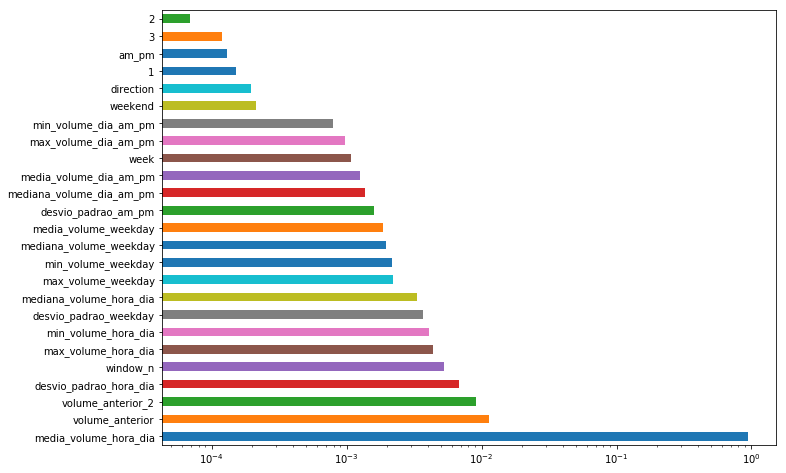

In [32]:
feat_importances = pd.Series(regressor_rf.feature_importances_, index=feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']].columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.rcParams['figure.figsize'] = (11,8)
plt.xscale('log')

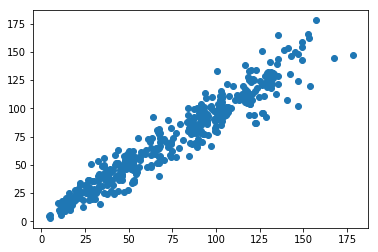

In [192]:
plt.scatter(y_pred_rf, values_test)

In [69]:
denominator_rf = y_pred_rf.dot(y_pred_rf) - y_pred_rf.mean() * y_pred_rf.sum()

In [70]:
m_rf = ( y_pred_rf.dot(values_test) - values_test.mean() * y_pred_rf.sum()) / denominator_rf

b_rf = ( values_test.mean() * y_pred_rf.dot(y_pred_rf) - y_pred_rf.mean() * y_pred_rf.dot(values_test)) / denominator_rf


In [71]:
pred_rf = m_rf * y_pred_rf + b_rf

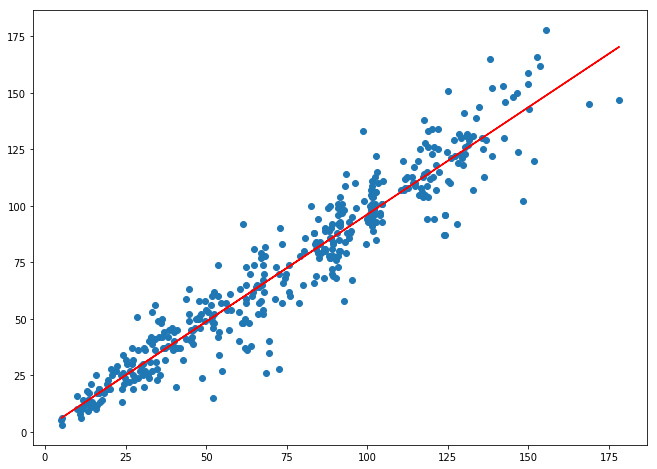

In [72]:
plt.scatter(y_pred_rf, values_test)
plt.plot(y_pred_rf, pred_rf, 'r')

In [73]:
res_rf = values_test - y_pred_rf
tot_rf = values_test - values_test.mean()
R_squared_rf = 1 - res_rf.dot(res_rf) / tot_rf.dot(tot_rf)
print(R_squared_rf)

0.9065498494957209


In [51]:
scores_rf = cross_val_score(regressor_rf,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test_rf = np.sqrt(-scores_rf)

In [54]:
#Com CV = 4
display_scores(tree_rmse_scores_test_rf)

Scores: [11.37475124  9.50333696  9.55331992 11.79396757]
Mean: 10.556343921938318
Standard deviation: 1.0387954145642364


In [ ]:
#Com CV = 10
display_scores(tree_rmse_scores_test_rf)

In [37]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20],
    'max_features': [None],
    'n_estimators': [200, 300, 500, 800, 1200, 1500]
    #colocar um intervalo mais logico. Treino teste e validacao (tira uma parte do treino para validacao, e os
    # e eu nao posso fazer isso pra proxima janela de treino)
    #volume proximo nao pode ser utilizado
    # a media de dias da semana anterior
    # max altura, max numero de features, n_estimadores (100, 200, 300, 400)
    # max altura (80, 90,100, 110)
    # n_features deixa o numero de features fixo que eu tenho passa o auto
    # random_state tirar do decision tree
    #fazer isso
    #falar primeiro do decision tree antes mesmo do random forest
}
# Create a based model
gbrt = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search_gbrt = GridSearchCV(estimator = gbrt, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [38]:
grid_search_gbrt.fit(feature_trainfeature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   9.6s
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   9.6s
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   9.6s
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   9.8s
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] . max_depth=1, max_features=None, n_estimators=300, total=   8.4s
[CV] max_depth=

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.1min


[CV] . max_depth=2, max_features=None, n_estimators=500, total=  28.8s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=500, total=  27.2s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=500, total=  28.7s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  38.2s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  36.2s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  47.3s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=2, max_features=None, n_estimators=800, total=  46.1s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV]  

[CV]  max_depth=4, max_features=None, n_estimators=1200, total= 2.4min
[CV] max_depth=4, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.0min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.0min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.0min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV]  max_depth=4, max_features=None, n_estimators=1500, total= 3.0min
[CV] max_depth=5, max_features=None, n_estimators=200 ................
[CV] . max_depth=5, max_features=None, n_estimators=200, total=  35.6s
[CV] max_depth=5, max_features=None, n_estimators=300 ................
[CV] . max_depth=5, max_features=None, n_estimators=200, total=  34.3s
[CV] max_depth=5, max_features=None, n_estimators=300 ................
[CV] .

[CV] . max_depth=7, max_features=None, n_estimators=300, total= 1.8min
[CV] max_depth=7, max_features=None, n_estimators=500 ................
[CV] . max_depth=7, max_features=None, n_estimators=300, total= 1.8min
[CV] max_depth=7, max_features=None, n_estimators=500 ................
[CV] . max_depth=7, max_features=None, n_estimators=300, total= 1.8min
[CV] max_depth=7, max_features=None, n_estimators=500 ................
[CV] . max_depth=7, max_features=None, n_estimators=500, total= 2.9min
[CV] max_depth=7, max_features=None, n_estimators=800 ................
[CV] . max_depth=7, max_features=None, n_estimators=500, total= 2.9min
[CV] max_depth=7, max_features=None, n_estimators=800 ................


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 58.6min


[CV] . max_depth=7, max_features=None, n_estimators=500, total= 2.9min
[CV] max_depth=7, max_features=None, n_estimators=800 ................
[CV] . max_depth=7, max_features=None, n_estimators=500, total= 3.0min
[CV] max_depth=7, max_features=None, n_estimators=800 ................
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 4.6min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 4.6min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 4.9min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=7, max_features=None, n_estimators=800, total= 4.7min
[CV] max_depth=7, max_features=None, n_estimators=1200 ...............
[CV]  max_depth=7, max_features=None, n_estimators=1200, total= 7.0min
[CV] max_depth=7, max_features=None, n_estimators=1500 ...............
[CV]  

[CV]  max_depth=9, max_features=None, n_estimators=1500, total=18.2min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=9, max_features=None, n_estimators=1500, total=18.3min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=9, max_features=None, n_estimators=1500, total=18.6min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=9, max_features=None, n_estimators=1500, total=18.4min
[CV] max_depth=10, max_features=None, n_estimators=200 ...............
[CV]  max_depth=10, max_features=None, n_estimators=200, total= 4.0min
[CV] max_depth=10, max_features=None, n_estimators=300 ...............
[CV]  max_depth=10, max_features=None, n_estimators=200, total= 3.9min
[CV] max_depth=10, max_features=None, n_estimators=300 ...............
[CV]  max_depth=10, max_features=None, n_estimators=200, total= 4.0min
[CV] max_depth=10, max_features=None, n_estimators=300 ...............
[CV]  

[CV]  max_depth=20, max_features=None, n_estimators=300, total=59.2min
[CV] max_depth=20, max_features=None, n_estimators=500 ...............
[CV]  max_depth=20, max_features=None, n_estimators=300, total=59.2min
[CV] max_depth=20, max_features=None, n_estimators=500 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total=57.9min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total=58.5min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total=58.1min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=500, total=58.5min
[CV] max_depth=20, max_features=None, n_estimators=800 ...............
[CV]  max_depth=20, max_features=None, n_estimators=800, total=58.8min
[CV] max_depth=20, max_features=None, n_estimators=1200 ..............
[CV]  

[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 854.4min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], 'max_features': [None], 'n_estimators': [200, 300, 500, 800, 1200, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [39]:
grid_search_gbrt.best_params_

{'max_depth': 9, 'max_features': None, 'n_estimators': 1500}

In [22]:
regressor_gbrt = GradientBoostingRegressor(n_estimators=1500,max_depth=9)

In [38]:
regressor_gbrt.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=9, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [39]:
y_pred_gbrt = regressor_gbrt.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])

In [40]:
mean_absolute_percentage_error(values_test, y_pred_gbrt)

0.17658983204815953

In [48]:
sqrt(mean_squared_error(values_test, y_pred_gbrt))

13.371942027050974

In [42]:
mean_absolute_error(values_test, y_pred_gbrt)

9.587727343492489

In [43]:
regressor_gbrt.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

0.9999459135690828

In [44]:
regressor_gbrt.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.8789552643778054

In [43]:
regressor_gbrt.feature_importances_

array([0.00285411, 0.00243315, 0.00201193, 0.00249647, 0.02043293,
       0.00292535, 0.08472612, 0.0929869 , 0.00091359, 0.0715784 ,
       0.08046842, 0.04207709, 0.04019586, 0.05683823, 0.0376911 ,
       0.04304695, 0.03819463, 0.03899495, 0.02539611, 0.04796591,
       0.04962927, 0.04646484, 0.04439818, 0.0438168 , 0.08146271])

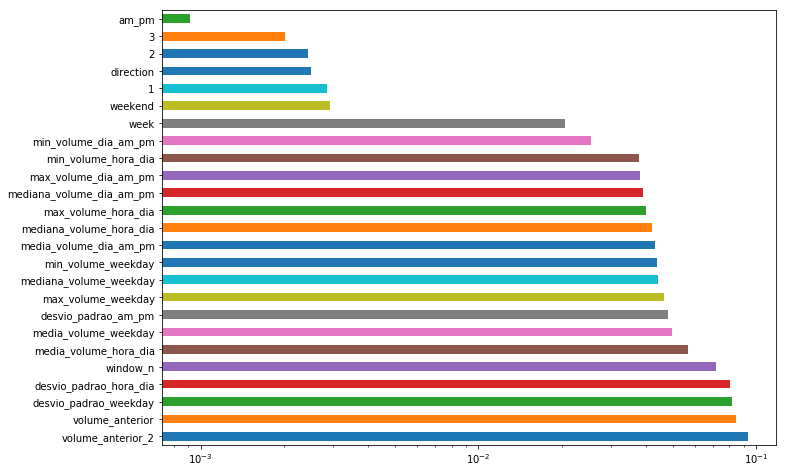

In [44]:
feat_importances_gbrt = pd.Series(regressor_gbrt.feature_importances_, index=feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']].columns)
feat_importances_gbrt.nlargest(25).plot(kind='barh')
plt.rcParams['figure.figsize'] = (11,8)
plt.xscale('log')

In [45]:
scores_gbrt = cross_val_score(regressor_gbrt,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test_gbrt = np.sqrt(-scores_gbrt)

In [46]:
def display_scores(scores):
    print("Scores:", (scores))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [49]:
display_scores(tree_rmse_scores_test_gbrt)

Scores: [11.09795622  8.89975748  9.52011071 12.69169571]
Mean: 10.55238003180599
Standard deviation: 1.472333706866428


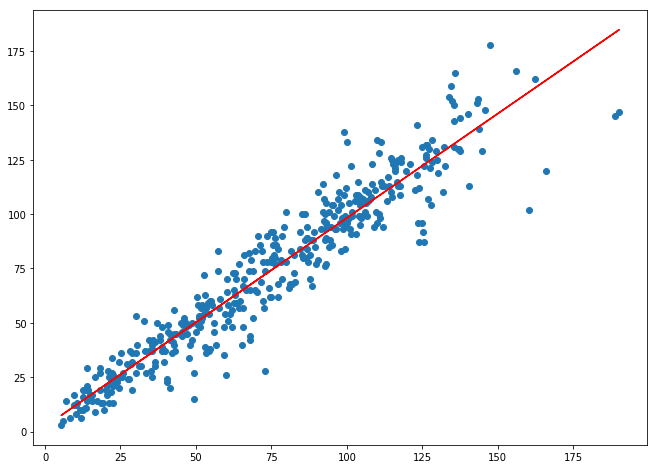

In [67]:
denominator = y_pred_gbrt.dot(y_pred_gbrt) - y_pred_gbrt.mean() * y_pred_gbrt.sum()

m_gbrt = ( y_pred_gbrt.dot(values_test) - values_test.mean() * y_pred_gbrt.sum()) / denominator

b_gbrt = ( values_test.mean() * y_pred_gbrt.dot(y_pred_gbrt) - y_pred_gbrt.mean() * y_pred_gbrt.dot(values_test)) / denominator

pred_gbrt = m_gbrt * y_pred_gbrt + b_gbrt

plt.scatter(y_pred_gbrt, values_test)
plt.plot(y_pred_gbrt, pred_gbrt, 'r')

In [75]:
res_gbrt = values_test - y_pred_gbrt
tot_gbrt = values_test - values_test.mean()
R_squared_gbrt = 1 - res_gbrt.dot(res_gbrt) / tot_gbrt.dot(tot_gbrt)
print(R_squared_gbrt)

0.9035343341500424


In [44]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20],
    #colocar um intervalo mais logico. Treino teste e validacao (tira uma parte do treino para validacao, e os
    # e eu nao posso fazer isso pra proxima janela de treino)
    #volume proximo nao pode ser utilizado
    # a media de dias da semana anterior
    # max altura, max numero de features, n_estimadores (100, 200, 300, 400)
    # max altura (80, 90,100, 110)
    # n_features deixa o numero de features fixo que eu tenho passa o auto
    # random_state tirar do decision tree
    #fazer isso
    #falar primeiro do decision tree antes mesmo do random forest
}
# Create a based model
dec = DecisionTreeRegressor()

# Instantiate the grid search model
grid_search_dec = GridSearchCV(estimator = dec, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [45]:
grid_search_dec.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']], values_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV] max_depth=1 .....................................................
[CV] max_depth=1 .....................................................
[CV] max_depth=1 .....................................................
[CV] max_depth=1 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=1, total=   0.1s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] ...................................... max_depth=2, total=   0.2s
[CV] ...................................... max_depth=1, total=   0.2s
[CV] max_depth=2 .....................................................
[CV] max_depth=3

[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    7.0s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [46]:
grid_search_dec.best_params_

{'max_depth': 6}

In [63]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'base_estimator': [DecisionTreeRegressor(max_depth=6)],
    'n_estimators': [200, 300, 500, 800, 1200, 1500]
    #colocar um intervalo mais logico. Treino teste e validacao (tira uma parte do treino para validacao, e os
    # e eu nao posso fazer isso pra proxima janela de treino)
    #volume proximo nao pode ser utilizado
    # a media de dias da semana anterior
    # max altura, max numero de features, n_estimadores (100, 200, 300, 400)
    # max altura (80, 90,100, 110)
    # n_features deixa o numero de features fixo que eu tenho passa o auto
    # random_state tirar do decision tree
    #fazer isso
    #falar primeiro do decision tree antes mesmo do random forest
}
# Create a based model
ada = AdaBoostRegressor()

# Instantiate the grid search model
grid_search_ada = GridSearchCV(estimator = ada, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [64]:
grid_search_ada.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']], values_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'), n_estimators=200 
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'), n_estimators=200 
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight

           presort=False, random_state=0, splitter='best'), n_estimators=800 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'), n_estimators=500, total= 2.1min
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'), n_estimators=800 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
        

[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 19.5min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')], 'n_estimators': [200, 300, 500, 800, 1200, 1500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [65]:
grid_search_ada.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
 'n_estimators': 300}

In [26]:
regressor_ada = AdaBoostRegressor(DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'), n_estimators = 300)

In [27]:
regressor_ada.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=None)

In [28]:
y_pred_ada = regressor_ada.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])

In [29]:
mean_absolute_percentage_error(values_test, y_pred_ada)

0.19771170145924813

In [30]:
sqrt(mean_squared_error(values_test, y_pred_ada))

10.57369212286428

In [31]:
mean_absolute_error(values_test, y_pred_ada)

8.642431475953288

In [32]:
regressor_ada.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

0.9069989098245735

In [33]:
regressor_ada.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.9243149229103998

In [50]:
scores_ada = cross_val_score(regressor_ada,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test_ada = np.sqrt(-scores_ada)

KeyboardInterrupt: 

In [37]:
display_scores(tree_rmse_scores_test_ada)

Scores: [11.63980973 13.93718511 11.61183923 14.52829676]
Mean: 12.929282708291053
Standard deviation: 1.3201430864356285


In [59]:
#Com o CV = 10
display_scores(tree_rmse_scores_test_ada)

Scores: [10.80712041 12.73423742 12.015693   11.40151946 16.1837614  10.69953055
 12.75799496 13.24763693 12.51636443 15.19554601]
Mean: 12.755940457417376
Standard deviation: 1.68553887140056


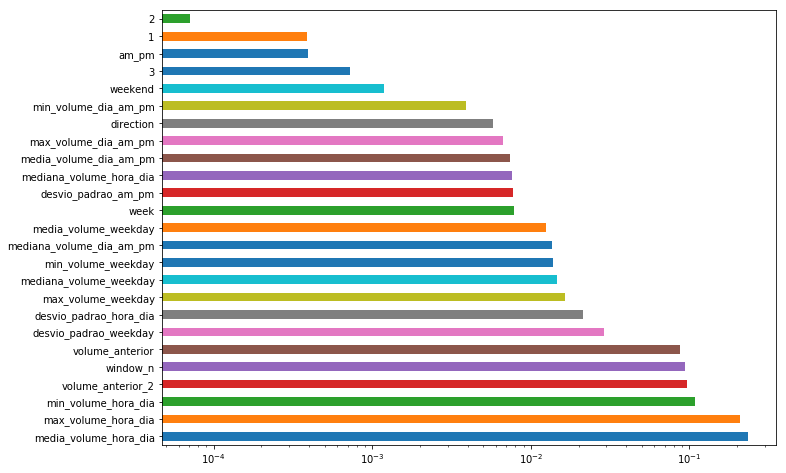

In [60]:
feat_importances_ada = pd.Series(regressor_ada.feature_importances_, index=feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']].columns)
feat_importances_ada.nlargest(25).plot(kind='barh')
plt.rcParams['figure.figsize'] = (11,8)
plt.xscale('log')

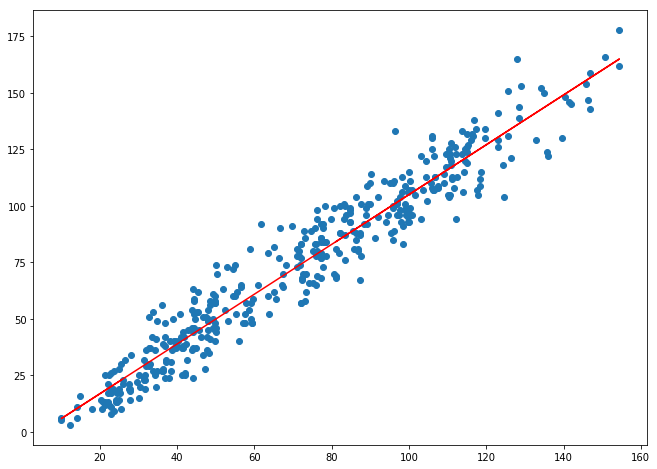

In [68]:
denominator_ada = y_pred_ada.dot(y_pred_ada) - y_pred_ada.mean() * y_pred_ada.sum()

m_ada = ( y_pred_ada.dot(values_test) - values_test.mean() * y_pred_ada.sum()) / denominator_ada

b_ada = ( values_test.mean() * y_pred_ada.dot(y_pred_ada) - y_pred_ada.mean() * y_pred_ada.dot(values_test)) / denominator_ada

pred_ada = m_ada * y_pred_ada + b_ada

plt.scatter(y_pred_ada, values_test)
plt.plot(y_pred_ada, pred_ada, 'r')

In [74]:
res_ada = values_test - y_pred_ada
tot_ada = values_test - values_test.mean()
R_squared_ada = 1 - res_ada.dot(res_ada) / tot_ada.dot(tot_ada)
print(R_squared_ada)

0.9236291052228275
